## Task:3 - Decision Trees

This workshop deals with understanding the working of decision trees.


In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing libraries in Python
import sklearn.datasets as datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
# Shape of dataframe
df.shape

(150, 4)

In [6]:
# Check the column name
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)',]]

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df['target']=iris.target
iris.target_names
y = df[['target']]

In [11]:
# Splitting the data into train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [12]:
x_train.reset_index(drop= True, inplace= True);
x_test.reset_index(drop= True, inplace= True);
y_train.reset_index(drop= True, inplace= True);
y_test.reset_index(drop= True, inplace= True);

In [13]:
for ind, column in enumerate(x_train.columns):
    scaler = StandardScaler()
    
    #fit to train data
    scaler.fit(x_train[[column]])
    
    #transform train data
    np_array = scaler.transform(x_train[[column]])
    x_train.loc[: , column] = pd.Series(np_array.flatten())
    
    #transform test data
    np_array = scaler.transform(x_test[[column]])
    x_test.loc[: , column] = pd.Series(np_array.flatten())

## Model Building

In [14]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [15]:
model3 = DecisionTreeClassifier(random_state=0, max_depth=8)

In [16]:
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [17]:
x_test_pred3 = model3.predict(x_test)
x_test_pred3

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [18]:
# Accuracy of train data
model3.score(x_train, y_train)

1.0

In [19]:
# Accuracy of test data
model3.score(x_test,y_test)

0.9777777777777777

In [20]:

# Defining the Confusion Matrix
def Confusion_Matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylim([0,5])
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels= [0,1], yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t)
    plt.show()

In [21]:
y_test.shape

(45, 1)

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,x_test_pred3.reshape(-1,1))
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [23]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
pip install scikit-learn


The following command must be run outside of the IPython shell:

    $ pip install scikit-learn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


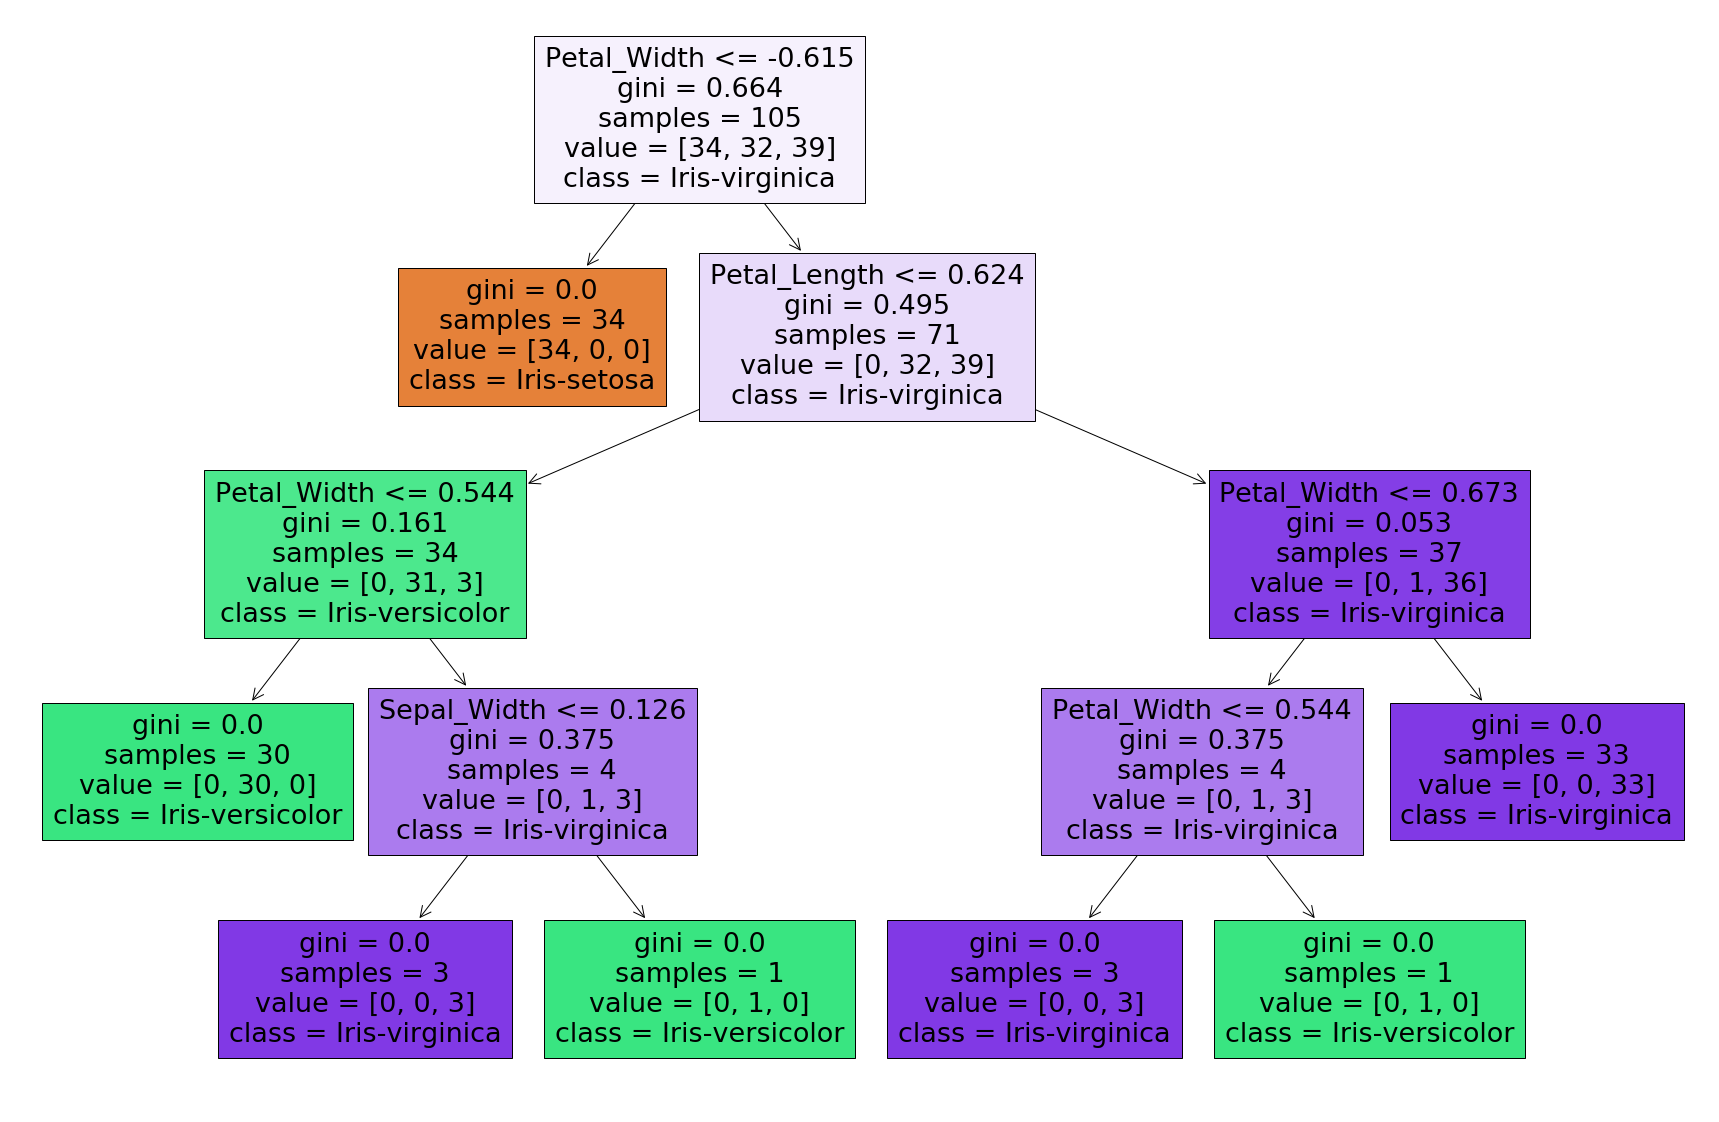

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features_names = list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(model3,feature_names=feature_names,class_names=class_names,filled=True);